<a href="https://colab.research.google.com/github/SamSilv2/Exerc-cios-MBT-Data-Science-e-IA/blob/main/Master_Semana2_Exercicios_Resolucao_Samuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Hipótese para a Média (uma variável)

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
drive.mount('/content/drive')
ideb = x'('/content/drive/MyDrive/1 - Atividades Sirius/S2 Comparação de Grupos/ideb.csv')

Mounted at /content/drive


In [ ]:
ideb = ideb[['ano', 'sigla_uf', 'taxa_aprovacao', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]
ideb

,ano,sigla_uf,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
0,2005,AC,64.1,161.80,150.80,2.4
1,2005,AC,53.9,167.80,165.60,2.3
2,2005,AC,49.3,151.80,149.60,1.8
3,2005,AC,48.8,163.60,155.80,1.9
4,2005,AC,48.8,159.00,153.39,1.9
...,...,...,...,...,...,...
130189,2019,SP,97.1,253.44,225.44,6.7
130190,2019,SP,97.4,246.38,231.63,6.7
130191,2019,SP,97.4,246.38,231.63,6.7
130192,2019,SP,99.6,245.08,227.11,6.7


### Atividade 2: Verifique quantas linhas e colunas possui esse dataframe. Veja também se há dados faltantes.

In [ ]:
ideb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130194 entries, 0 to 130193
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          130194 non-null  int64  
 1   sigla_uf                     130194 non-null  object 
 2   taxa_aprovacao               103458 non-null  float64
 3   nota_saeb_matematica         88345 non-null   float64
 4   nota_saeb_lingua_portuguesa  88345 non-null   float64
 5   ideb                         100369 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.0+ MB


In [ ]:
print(f'O DataFrame contém {ideb.shape[0]} linhas e {ideb.shape[1]} colunas.')

O DataFrame contém 130194 linhas e 6 colunas.


In [ ]:
print(f'O DataFrame contém a seguinte quantidade de dados faltantes por coluna:\n{ideb.isna().sum()}')

O DataFrame contém a seguinte quantidade de dados faltantes por coluna:
ano                                0
sigla_uf                           0
taxa_aprovacao                 26736
nota_saeb_matematica           41849
nota_saeb_lingua_portuguesa    41849
ideb                           29825
dtype: int64


### Atividade 3: Teste a hipótese de a média da taxa de aprovação para o ano de 2005 ser igual a 78. Considere um nível de confiança de 95%.

Descreva, sucintamente, o resultado do teste de hipótese. Não esqueça de incluir as estatísticas encontradas.

Dica: crie um DataFrame somente com os valores do ano e da variável de interesse.


Resposta: A hipótese nula é H0: Média = 78 e a hipótese alternativa é Ha : Média ≠ de 78

In [ ]:
taxa_2005 = ideb[ideb['ano'] == 2005]['taxa_aprovacao'].dropna()

In [ ]:
ttest_1samp(taxa_2005,78)

TtestResult(statistic=20.890080427394643, pvalue=3.1469508067020596e-95, df=12082)

In [ ]:
taxa_2005.mean()

80.33077050401391

Como o P-value é proximo de 0, podemos considerar com 95% de confiança que a média da taxa de aprovação no ano de 2005 é diferente de 78.

# Teste de Hipótese para a Média (duas variáveis independentes)

Agora vamos aplicar um teste de hipótese para a média de duas populações independentes usando dados reais. Desejamos saber se a média para ambas é a mesma.

### Atividade 4: Teste a hipótese de a média do IDEB para os estados do Rio Grande do Sul e do Ceará, no ano de 2019, serem iguais. Considere um nível de confiança de 95%

Dica: Primeiro crie um dataframe auxiliar contendo apenas os dados referentes a 2019. Depois selecione dois conjunto de valores de IDEB, um apenas para o estado do Rio Grande do Sul e outro apenas para o estado do Ceará.

Resposta: A hipótese nula é H0: Média CE = Média RS e a hipótese alternativa é Ha : Média CE ≠ Média RS

In [ ]:
rs_2019 = ideb.loc[(ideb['ano'] == 2019) & (ideb['sigla_uf'] == 'RS')]
ideb_rs_2019 = rs_2019['ideb'].dropna()
ideb_rs_2019 = ideb_rs_2019.sample(300)

ce_2019 = ideb.loc[(ideb['ano'] == 2019) & (ideb['sigla_uf'] == 'CE')]
ideb_ce_2019 = ce_2019['ideb'].dropna()
ideb_ce_2019 = ideb_ce_2019.sample(300)

In [ ]:
ttest_ind(ideb_rs_2019,ideb_ce_2019)

TtestResult(statistic=-2.7650262184944214, pvalue=0.005867447973811786, df=598.0)

In [ ]:
print(ideb_rs_2019.mean())
print(ideb_ce_2019.mean())

6.177
6.357333333333333


Apesar de médias semelhantes, como o P-Valor é menor que 0,05. podemos considerar com 95% de certeza que a média do IDEB para os dois estados não é igual.

### Atividade 5: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB dos dois estados.

<Axes: xlabel='sigla_uf', ylabel='ideb'>

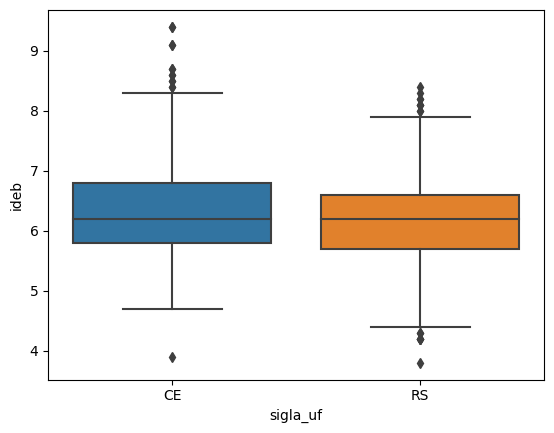

In [ ]:
rs_ce_2019 = ideb.loc[(ideb['ano'] == 2019) & ((ideb['sigla_uf'] == 'RS')|(ideb['sigla_uf'] == 'CE'))].dropna()
sns.boxplot(y = rs_ce_2019['ideb'],x = rs_ce_2019['sigla_uf'] )


<ipython-input-25-82c25fe54dcc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ideb_rs_2019,color='red',label='RS')
<ipython-input-25-82c25fe54dcc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ideb_ce_2019,color='blue',label='ce')


<Axes: xlabel='ideb', ylabel='Density'>

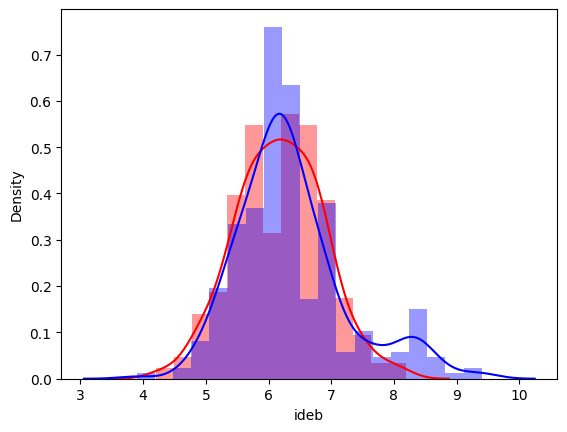

In [ ]:
sns.distplot(ideb_rs_2019,color='red',label='RS')
sns.distplot(ideb_ce_2019,color='blue',label='ce')

### Atividade 6: Teste a hipótese de a média do IDEB para os anos de 2005 e 2019 serem iguais. Considere um nível de confiança de 95%

Dica: Crie dois dataframes auxiliares e selecione 300 linhas de cada um apenas (sem conter valores faltantes) para realizar o teste.

Resposta: A hipótese nula é H0: Média IDEB 2005 = Média IDEB 2019 e a hipótese alternativa é Ha : Média IDEB 2005 ≠ Média IDEB 2019

In [ ]:
ideb_2005 = ideb[ideb['ano']==2005]['ideb'].dropna()
ideb_2019 = ideb[ideb['ano']==2019]['ideb'].dropna()

In [ ]:
ideb_2005

0         2.4
1         2.3
2         1.8
3         1.9
4         1.9
         ... 
124027    5.7
124028    5.7
124029    5.7
128816    6.7
128817    6.7
Name: ideb, Length: 12083, dtype: float64

In [ ]:
ideb_2019

3409      8.1
3410      8.9
3411      8.9
3412      8.1
3413      8.1
         ... 
130189    6.7
130190    6.7
130191    6.7
130192    6.7
130193    6.7
Name: ideb, Length: 12188, dtype: float64

In [ ]:
ttest_ind(ideb_2005,ideb_2019)

TtestResult(statistic=-176.6517993560258, pvalue=0.0, df=24269.0)

In [ ]:
print(ideb_2005.mean())
print(ideb_2019.mean())

3.6035752710419597
5.7443058746307845


Com o P-Valor arrendodado para zero, podemos considerar com 95% de certeza que a média do IDEB para os dois anos não é igual.

### Atividade 7: Com base no resultado do teste anterior, faça um boxplot que lhe ajude a entender melhor os resultados obtidos. Isto é, compare o boxplot do IDEB para os dois anos.

<Axes: xlabel='ano', ylabel='ideb'>

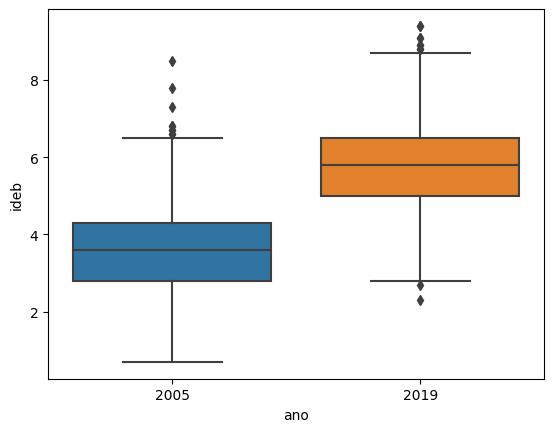

In [ ]:
ideb_2005_2019 = ideb[(ideb['ano']==2005) | (ideb['ano']==2019)][['ideb','ano']].dropna()
sns.boxplot(y = ideb_2005_2019['ideb'], x = ideb_2005_2019['ano'] )

<ipython-input-34-8650a5b91e92>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ideb_2005 ,color='red',label='2005')
<ipython-input-34-8650a5b91e92>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ideb_2019,color='blue',label='2019')


<Axes: xlabel='ideb', ylabel='Density'>

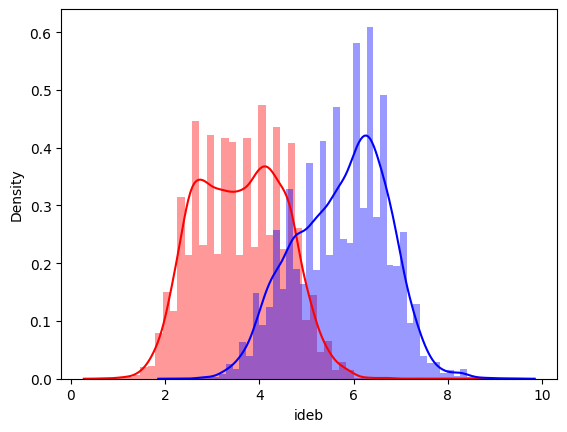

In [ ]:
sns.distplot(ideb_2005 ,color='red',label='2005')
sns.distplot(ideb_2019,color='blue',label='2019')

# Análise de Variância (ANOVA) One-Way

### Atividade 8: Vamos comparar a média do IDEB para os três estados da região sul, em 2019, para ver se estas médias podem ser consideradas iguais. Considere um nível de confiança de 95%.

Dica: Crie três dataframes auxiliares, um para cada estado.

In [ ]:
ideb_2019_rs = ideb[(ideb['ano']==2019) | (ideb['sigla_uf']=='RS')]['ideb'].dropna().sample(17000)
ideb_2019_sc = ideb[(ideb['ano']==2019) | (ideb['sigla_uf']=='SC')]['ideb'].dropna().sample(17000)
ideb_2019_pr = ideb[(ideb['ano']==2019) | (ideb['sigla_uf']=='PR')]['ideb'].dropna().sample(17000)

In [ ]:
f_oneway(ideb_2019_rs, ideb_2019_sc, ideb_2019_pr)

F_onewayResult(statistic=34.79901383710027, pvalue=7.893755481473324e-16)

Como o P-valor é muito próxima de zero, podemos considerar com um nível de confiança de 95% que as médias não são iguais

### Atividade 9: Faça um boxplot para entender melhor o que está acontecendo com os valores do IDEB para os três estados.

In [ ]:
ideb_2019_rs_sc_pr = ideb[(ideb['ano']==2019) & ((ideb['sigla_uf']=='RS')|(ideb['sigla_uf']=='SC')|(ideb['sigla_uf']=='PR'))][['ideb','sigla_uf']].dropna()

<Axes: xlabel='sigla_uf', ylabel='ideb'>

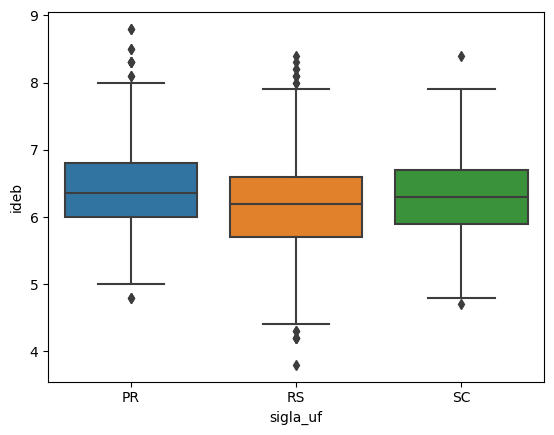

In [ ]:
sns.boxplot(y = ideb_2019_rs_sc_pr['ideb'], x = ideb_2019_rs_sc_pr['sigla_uf'] )

### Atividade 10: Faça um teste Post-hoc para verificar se de fato é o estado de Santa Catarina tem média diferente dos demais estados.

In [ ]:
print(pairwise_tukeyhsd(endog = ideb_2019_rs_sc_pr['ideb'],
                  groups = ideb_2019_rs_sc_pr['sigla_uf'],
                  alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    PR     RS  -0.2294    0.0  -0.302 -0.1568   True
    PR     SC  -0.1123 0.0035 -0.1936  -0.031   True
    RS     SC   0.1171 0.0009  0.0414  0.1928   True
----------------------------------------------------
